<h1>04. How to understand data statistically through plotting </h1>
<br>
Seaborn is another library built on top of matplotlib that integrates closely with pandas dataframes. It’s especially known for its aesthetics and built-in statistical features in plots. 

<p class="lead"> 
Table of Contents: 

- <a href="#Why-do-we-use-seaborn?">Why do we use seaborn?</a>
- <a href="#Seaborn-plotting-syntax">Seaborn plotting syntax</a>    
- <a href="#Create-statistical-plots">Create statistical plots</a>
- <a href="#Visualizing-multiple-relationships">Visualizing multiple relationships</a>

    
</p>





<div>
<h2 class="breadcrumb">Why do we use seaborn?</h2><p>
</div>

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. (seaborn.pydata.org)

- The syntax is simple and easy to use. 
- Seaborn provides out-of-box nice looking plots. Check out the [example gallery](https://seaborn.pydata.org/examples/index.html) for inspiration. 
- It's natural to include statistical information in your plots using Seaborn. 

<div>
<h2 class="breadcrumb">Seaborn plotting syntax</h2><p>
</div>

Import libraries and data:

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
# df = pd.read_csv('assets/mpg.csv')

In [3]:
df = pd.read_csv('mpg.csv')

<div class="alert alert-success">
<h4>Tips</h4>

- Use `sns.set_theme()` for default Seaborn theme.

In [6]:
sns.set_theme()

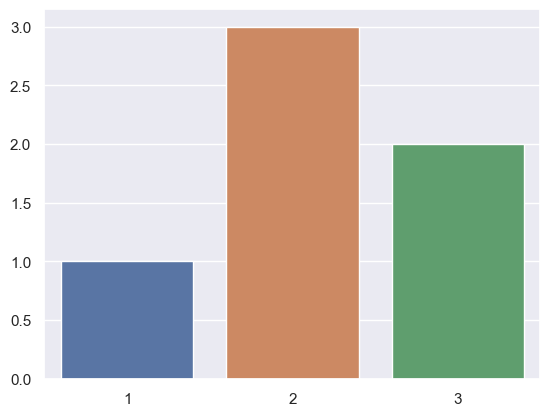

In [7]:
sns.barplot(x=[1, 2, 3], y=[1, 3, 2]);

## Axes-level functions ←←←←←←←←←←←←←←←←←←←←←←←←←←←←←← stopped here
Axes-level functions plot data onto a single `matplotlib.pyplot.Axes` object.

### Histogram

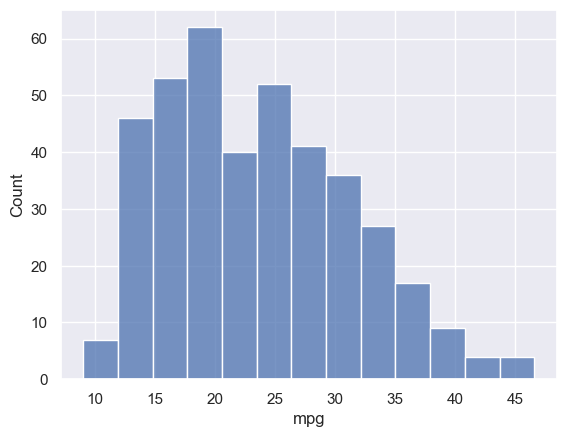

In [8]:
sns.histplot(data=df, x='mpg');

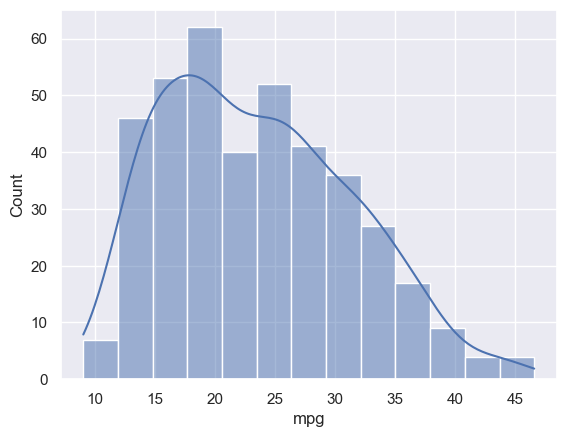

In [9]:
sns.histplot(data=df, x='mpg', kde=True);

### Scatter plot

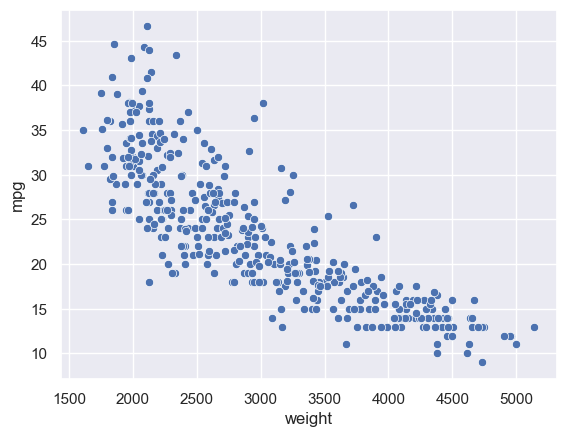

In [10]:
sns.scatterplot(data=df, x='weight', y='mpg');

### Add `hue` to determine the color of plot elements

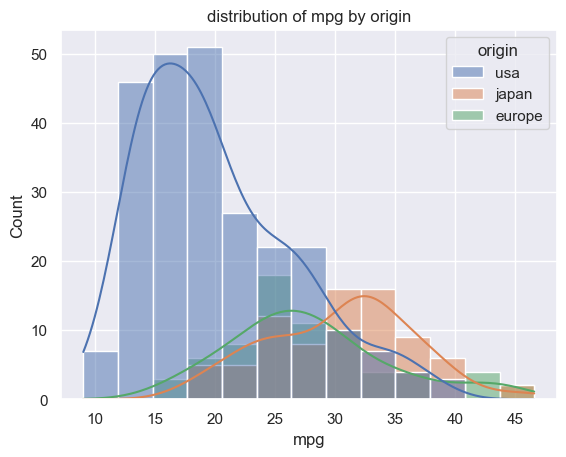

In [14]:
sns.histplot(data=df, x='mpg', kde=True, hue='origin').set(title='distribution of mpg by origin');

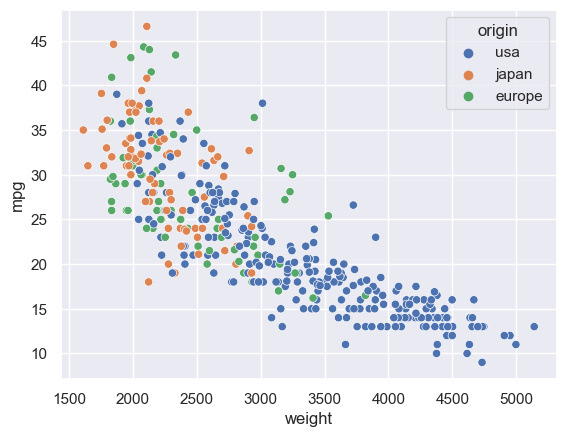

In [15]:
sns.scatterplot(data=df, x='weight', y='mpg', hue='origin');

### Show the counts of observations in each categorical bin using bars.



In [ ]:
df.origin.value_counts().plot(kind='bar');

In [ ]:
sns.countplot(data=df, x='origin');

### Integrate with Matplotlib

> The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they also accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,5))
sns.histplot(data=df, x='mpg', kde=True, hue='origin', ax=ax);


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,5))
sns.histplot(data=df, x='mpg', kde=True, hue='origin', ax=ax1);
sns.scatterplot(data=df, x='weight', y="mpg", hue='origin', ax=ax2);

<div class="alert alert-info">
<h4>Exercise</h4>

- Load the Penguins dataset from 'assets/penguins.csv' and call it `dfe`.  
- Use Seaborn to visualize the distribution of body mass, the relationship between flipper length and body mass, and visualize the differences among species. 

<details><summary><i><u>(Hint)</u><i></summary><br>
Use `hue='species'`.
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dfe = pd.read_csv('assets/penguins.csv')
sns.histplot(data=dfe, x='body_mass_g', kde=True, hue='species');
sns.scatterplot(data=dfe, x='flipper_length_mm', y="body_mass_g", hue='species');
```
</details>
</details>
</div>

### Figure-level functions

<img id="Image1" src="assets/seaborn.jpeg" align="left"/>

In [ ]:
sns.relplot(data=df, x='weight', y='mpg', kind='scatter');

In [ ]:
sns.displot(data=df, x='mpg', kind='kde');

In [ ]:
sns.catplot(data=df, x='origin', y='mpg', kind='violin');

<div class="alert alert-info">
<h4>Exercise</h4>

- Explore the Figure-level functions with the Penguins dataset.
- Use the Figure-level functions to visualize the distribution of body mass, the relationship between flipper length and body mass, and visualize the differences among species.

<details><summary><i><u>(Hint)</u><i></summary><br>
Use sns.displot and sns.relplot.
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
sns.displot(data=dfe, x='body_mass_g', kind='hist', kde=True, hue='species');
sns.relplot(data=dfe, x='flipper_length_mm', y="body_mass_g", kind='scatter', hue='species');
```
</details>
</details>    
</div>

<div>
<h2 class="breadcrumb">Create statistical plots</h2><p>
</div>

### Plotting the confidence interval or standard deviation around the mean

- Default: plot 95% CI. 
> The default behavior in Seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean.


- Define `ci='sd'`
> Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

In [ ]:
sns.relplot(data=df, x='cylinders', y='mpg', kind='line', ci='sd');

### Draw linear regression models

In [ ]:
sns.lmplot(data=df, x='weight', y='mpg');

Specify hue and markers for origin:

In [ ]:
sns.lmplot(data=df, x="weight", y="mpg", hue="origin", markers=['o','x','+']);

Separate plot by origin in three columns:

In [ ]:
sns.lmplot(data=df, x="weight", y="mpg", row="origin");

<div class="alert alert-info">
<h4>Exercise</h4>

- Plot the relationship between flipper length and body mass, visualize the differences among species, and draw regression lines in those plots. 

<details><summary><i><u>(Hint)</u><i></summary><br>
Use sns.lmplot    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
sns.lmplot(data=dfe, x='flipper_length_mm', y="body_mass_g");
sns.lmplot(data=dfe, x='flipper_length_mm', y="body_mass_g", hue='species');
```
</details>
</details>
</div>

<div>
<h2 class="breadcrumb">Visualizing multiple relationships</h2><p>
</div>

>  `jointplot()` and `pairplot()` employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure.

> jointplot() focuses on a single relationship:

In [ ]:
sns.jointplot(data=df, x="weight", y="mpg", kind="reg");

In [ ]:
sns.jointplot(data=df, x="weight", y="mpg", hue='origin');

> pairplot() visualizes every pairwise combination of variables simultaneously:

In [ ]:
sns.pairplot(data=df);

In [ ]:
sns.pairplot(data=df, hue="origin");